In [1]:
from pca import pca as pca
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import sys
pd.set_option('display.max_rows', None, 'display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

In [3]:
df_lu = pd.read_csv("Luxembourg_new.csv")
df_de = pd.read_csv("Deutschland_new.csv")
df_be = pd.read_csv("Belgien_new.csv")
df_fr = pd.read_csv("Frankreich_new.csv")

df_lu = df_lu.drop(['baujahr', 'Bevölkerung', 'Wohnung', 'garten'], axis=1)
df_de = df_de.drop([ 'parkplätze', 'garten', 'schlafzimmer','Wohnung','Haus','DistanzSaarbrücken','DistanzFrankfurt'], axis=1)
df_be = df_be.drop(['parkplätze', 'baujahr','Bevölkerung','DistanzNamur','DistanzMaastricht','DistanzLuxemburg','DistanzBrüssel','garten','schlafzimmer','Wohnung'], axis=1)
df_fr = df_fr.drop(['Bevölkerung','schlafzimmer', 'DistanzSaarbrücken','DistanzThionville','DistanzMetz','DistanzLuxemburg','Wohnung','garten'], axis=1)

features_lu = ['Distanz','fläche_m2','schlafzimmer','badezimmer','parkplätze','Haus']
features_fr = ['baujahr','fläche_m2','parkplätze','badezimmer','Haus']
features_be = ['fläche_m2','badezimmer','Haus']
features_de = ['baujahr','DistanzKöln','DistanzLuxemburg','fläche_m2','badezimmer']

In [4]:
# Test Und Training Daten splitten:
train_lu, test_lu = train_test_split(df_lu, test_size=0.2)
train_fr, test_fr = train_test_split(df_fr, test_size=0.2)
train_be, test_be = train_test_split(df_be, test_size=0.2)
train_de, test_de = train_test_split(df_de, test_size=0.2)

[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


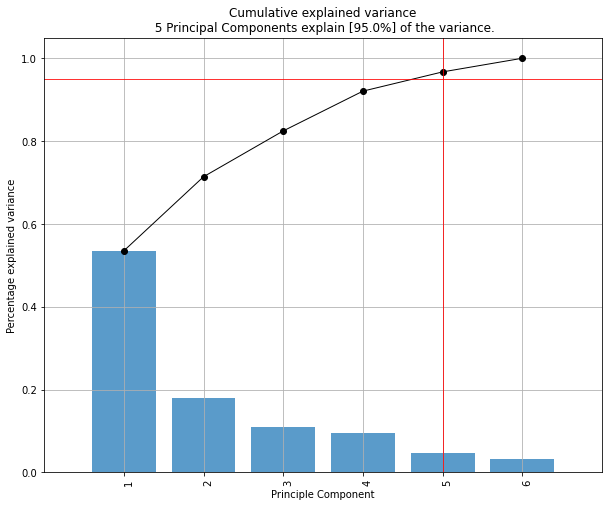

<Figure size 432x288 with 0 Axes>

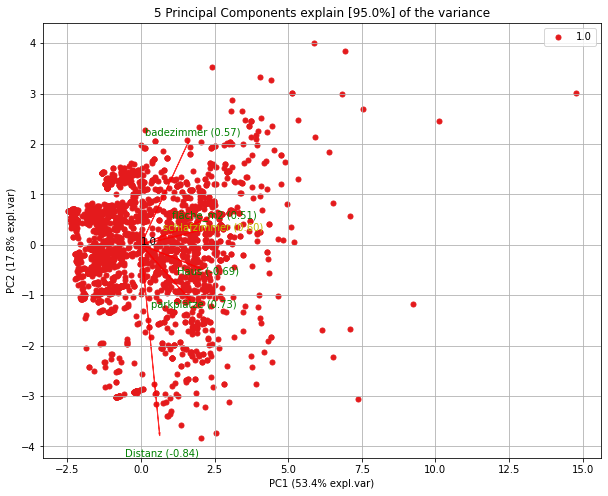

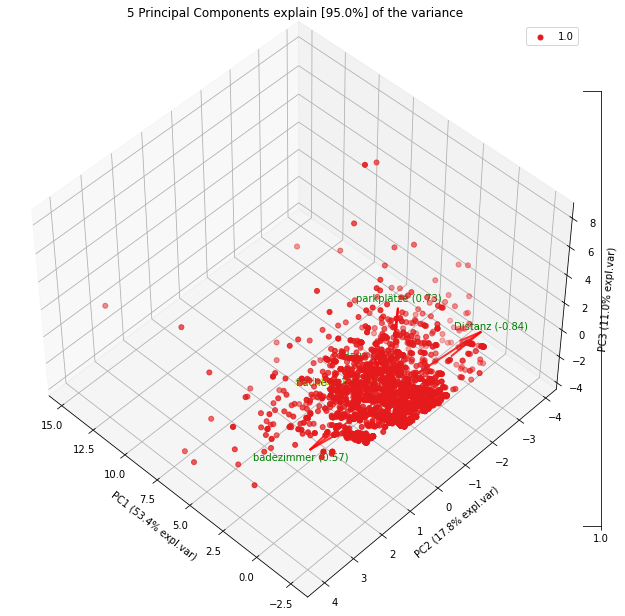

    PC       feature   loading  type
0  PC1     fläche_m2  0.509533  best
1  PC2       Distanz -0.840655  best
2  PC3    parkplätze  0.729504  best
3  PC4    badezimmer  0.574150  best
4  PC5          Haus -0.686853  best
5  PC6     fläche_m2  0.803131  best
6  PC5  schlafzimmer  0.600734  weak


In [5]:
x = train_lu.loc[:, features_lu].values
y = train_lu['kaufpreis']

#Werte skalieren, so dass Durchschnitt jedes Datenpunktes(alle Werte in einer Reihe) 0, und Standardabweichung 1 ist
x = StandardScaler().fit_transform(x)

# Reduzieren der Komponenten so dass Komponenten 95% der Abweichungen erklären
model = pca(n_components=0.95)

# Oder auf 3 (wählbar) Komponenten reduzieren
#model = pca(n_components=5)

# Fit transform
results = model.fit_transform(x,col_labels = features_lu)

# Plot explained variance
fig, ax = model.plot()

# Make biplot with the number of features
fig, ax = model.biplot()

#Make a 3d Biplot
ax = model.biplot3d()

#Print Top Features in rank order:
print(results['topfeat'])

In [6]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Fit
regr.fit(results['PC'], y)

# Calibration
y_c = regr.predict(results['PC'])

# Cross-validation
y_cv = cross_val_predict(regr, results['PC'], y, cv=10)

# Calcuate scores for calibration and cross-validation
score_c = r2_score(y, y_c)

score_cv = r2_score(y, y_cv)

# calculate the mean square error for calibration and cross validation
mse_c = mean_squared_error(y, y_c)
mse_cv = mean_squared_error(y, y_cv)

print(score_c)
print(score_cv)
print(mse_c)
print(mse_cv)

0.6013859148953885
0.5983744560042337
116896769485.13846
117779903897.51355


[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


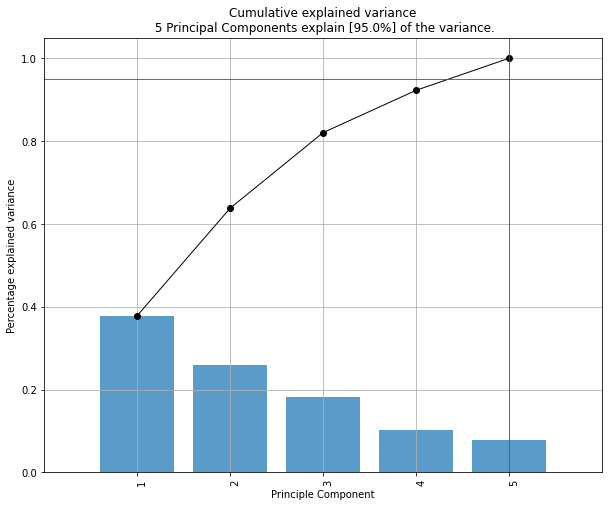

<Figure size 432x288 with 0 Axes>

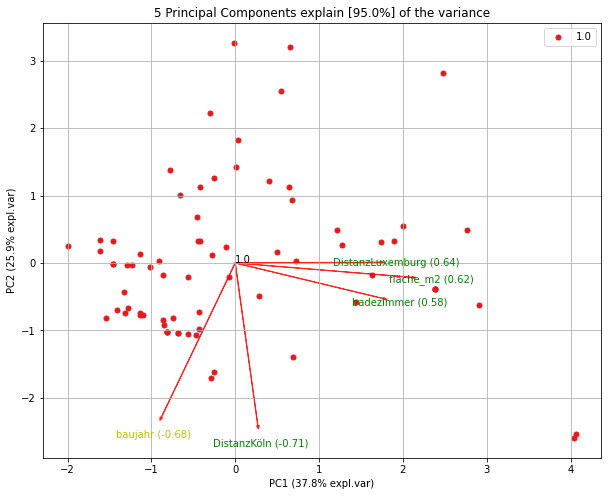

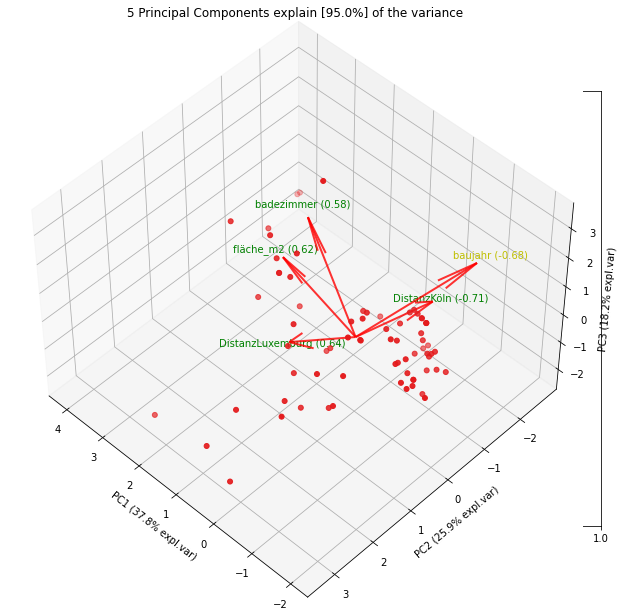

    PC           feature   loading  type
0  PC1         fläche_m2  0.624289  best
1  PC2       DistanzKöln -0.714932  best
2  PC3        badezimmer  0.583652  best
3  PC4  DistanzLuxemburg  0.642237  best
4  PC5         fläche_m2 -0.712868  best
5  PC2           baujahr -0.678528  weak


In [7]:
x = train_de.loc[:, features_de].values
x = StandardScaler().fit_transform(x)

# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
model = pca(n_components=0.95)

# Reduce the data towards 3 PCs
#model = pca(n_components=3)

# Fit transform
results = model.fit_transform(x, col_labels = features_de)

# Plot explained variance
fig, ax = model.plot()

# Make biplot with the number of features
fig, ax = model.biplot()

#Make a 3d Biplot
ax = model.biplot3d(n_feat=10, legend=False)

#Print Top Features in rank order:
print(results['topfeat'])

[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [3] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


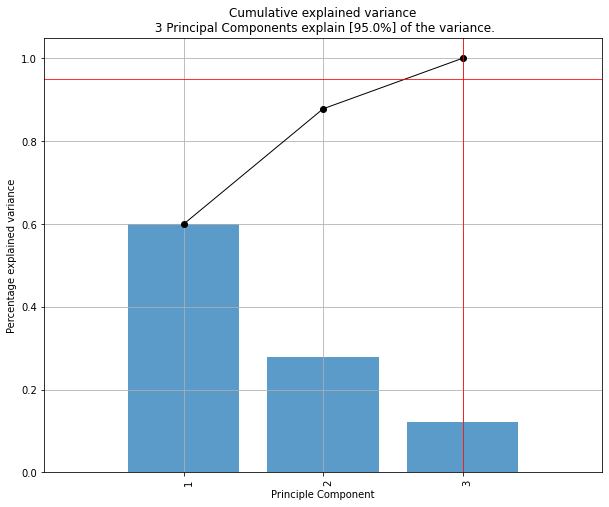

<Figure size 432x288 with 0 Axes>

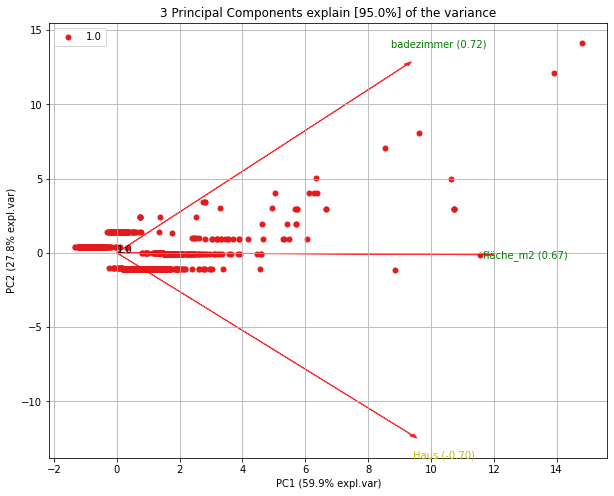

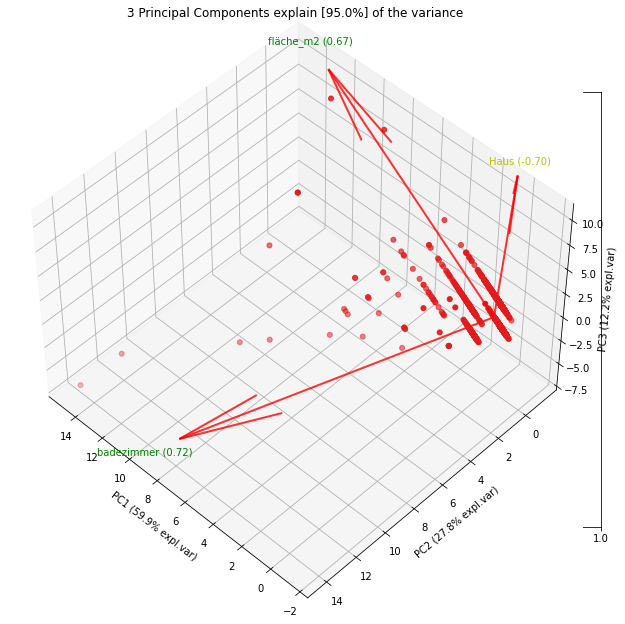

    PC     feature   loading  type
0  PC1   fläche_m2  0.665236  best
1  PC2  badezimmer  0.718074  best
2  PC3   fläche_m2  0.746598  best
3  PC2        Haus -0.695929  weak


In [8]:
x = train_be.loc[:, features_be].values
x = StandardScaler().fit_transform(x)

# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
model = pca(n_components=0.95)

# Reduce the data towards 3 PCs
#model = pca(n_components=3)

# Fit transform
results = model.fit_transform(x,col_labels = features_be)

# Plot explained variance
fig, ax = model.plot()

# Make biplot with the number of features
fig, ax = model.biplot()

#Make a 3d Biplot
ax = model.biplot3d(n_feat=10, legend=False)

#Print Top Features in rank order:
print(results['topfeat'])

[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


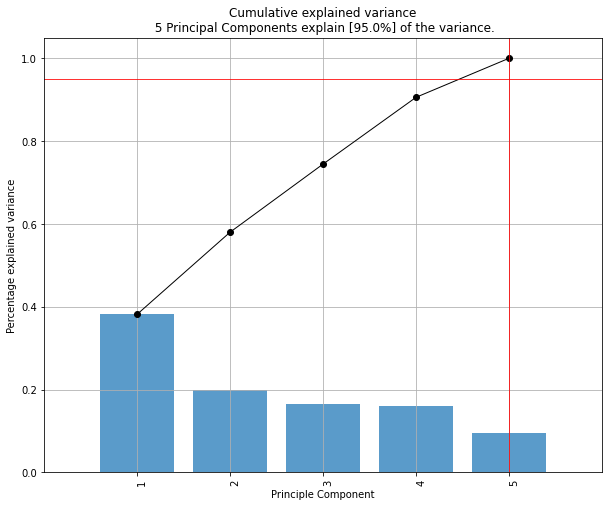

<Figure size 432x288 with 0 Axes>

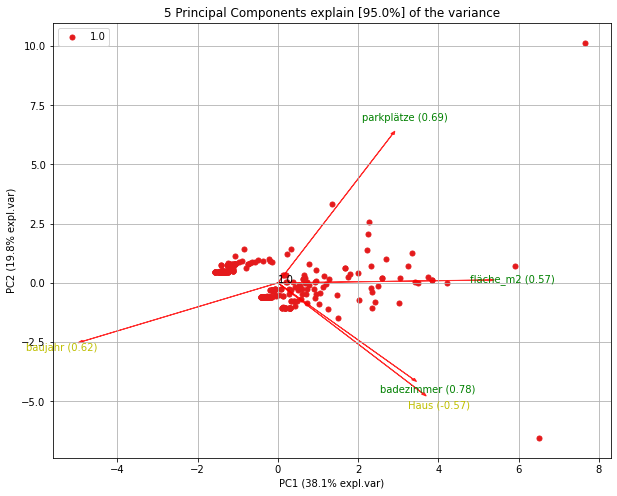

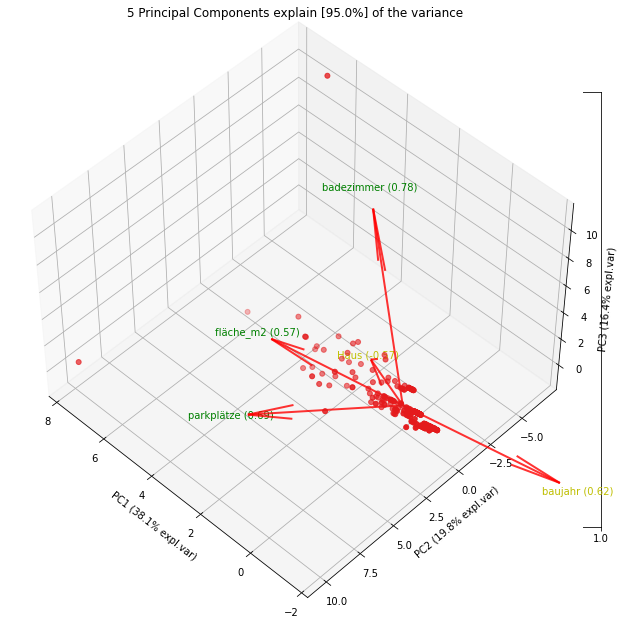

    PC     feature   loading  type
0  PC1   fläche_m2  0.574495  best
1  PC2  parkplätze  0.685807  best
2  PC3  badezimmer  0.777803  best
3  PC4  parkplätze  0.654647  best
4  PC5   fläche_m2  0.714056  best
5  PC5     baujahr  0.623568  weak
6  PC3        Haus -0.573709  weak


In [9]:
x = train_fr.loc[:, features_fr].values
x = StandardScaler().fit_transform(x)

# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
model = pca(n_components=0.95)

# Reduce the data towards 3 PCs
#model = pca(n_components=1)

# Fit transform
results = model.fit_transform(x,col_labels = features_fr)

# Plot explained variance
fig, ax = model.plot()

# Make biplot with the number of features
fig, ax = model.biplot()

#Make a 3d Biplot
ax = model.biplot3d(n_feat=10, legend=False)

#Print Top Features in rank order:
print(results['topfeat'])